<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">

Definitions: **Determinants**

In essence, a determinant is a special number associated with a square matrix. It tells us several things:

1. **Invertibility:** If the determinant is non-zero, the matrix is invertible (has an inverse). This means you can solve linear systems involving that matrix.

2. **Scaling Factor:** A determinant tells you how much a linear transformation associated with the matrix scales areas or volumes. For example, in 2D, the determinant's absolute value represents the area of a parallelogram defined by the matrix's column vectors.

3. **Orientation:** The determinant's sign indicates whether the transformation preserves or reverses the orientation (handedness) of space. A positive determinant means preservation, while a negative determinant means reversal.

</div>


**Calculation with SageMath**

SageMath makes determinant calculation easy. Let's see an example:

In [1]:
A = matrix(QQ, 3, [1,2,3,0,1,2,0,0,1])
b = vector(QQ, [4,3,2])

# Calculate the determinant
det_A = A.det()

print(det_A)

1


**Example of using the determinant**

Because det(A) is non-zero, we know this system has a unique solution. One way to find it is using the inverse matrix:


In [2]:
x = A.inverse() * b
print(x)

(0, -1, 2)


This tells us that $x = 0$, $y = -1$, and $z = 2$ is the solution to our system.


### Visualizing Determinants

Let's use SageMath's plotting capabilities to visualize determinants geometrically.

**2D Case (Parallelogram)**

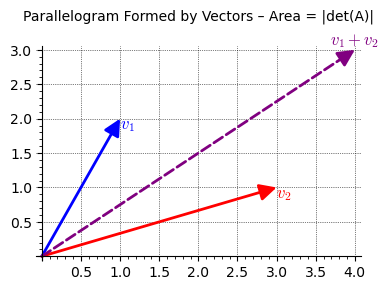

In [3]:
# Define vectors (columns of our matrix)
v1 = vector([1, 2])
v2 = vector([3, 1])

# Create the plot
p = plot(v1, color='blue') + \
    plot(v2, color='red') + \
    plot(v1 + v2, color='purple', linestyle='dashed')

# Add labels and title
p = p + text("   $v_1$", v1, 
             fontsize=12, color='blue', vertical_alignment='top')

p = p + text("   $v_2$", v2, 
             fontsize=12, color='red', vertical_alignment='top')

p = p + text("$v_1 + v_2$", v1 + v2, 
             fontsize=12, color='purple', vertical_alignment='bottom')

p.show(title="Parallelogram Formed by Vectors – Area = |det(A)|\n", 
       figsize=4, gridlines=True)

In this code:

1. We create two vectors, `v1` and `v2`.
2. We plot these vectors and their sum (which completes the parallelogram).
3. The area of the parallelogram is the absolute value of the determinant of the matrix formed by `v1` and `v2` as columns.


Let's actually calculate the area.

In [4]:
A_2D = matrix([v1, v2])

area = abs(A_2D.det()) 
print(f"Area of the parallelogram: {area}")

Area of the parallelogram: 5


Let's estimate the area to confirm ...

Parallelogram: $Area = Base * Height$

In [5]:
# v2 length from trig
base = sqrt(3**2 + 1**2)

# approximate from the graph the
# line from (1.5,0.5) to (1.0,2.0)
height = sqrt(0.5**2 + 1.5**2) 

area = v1 * v2
print(area.n(digits=2))

5.0


**3D Case (Parallelepiped)**

Visualizing in 3D is a bit trickier but still possible with SageMath:

<div style="background-color:yellow; padding: 5px 10px 0px 10px; border: 1px solid black;">

Definitions: **Parallelepiped**

A parallelepiped is a three-dimensional geometric figure with six parallelogram faces. It has 8 vertices, 12 edges, and opposite faces that are parallel and congruent. The volume can be calculated using the scalar triple product of its edge vectors. Essentially, it's a skewed box where the angles between edges aren't necessarily 90 degrees. If all angles are right and faces are rectangles, it's called a rectangular parallelepiped or cuboid.

In other words, a cube is a special case of a parallelepiped. In a cube, all six faces are squares, and all edges have the same length. Additionally, all angles between the edges are 90 degrees. Thus, while every cube is a parallelepiped, not every parallelepiped is a cube.

</div>

In [6]:
# Define vectors
u = vector([2, 0, 0])
v = vector([0, 2, 0])
w = vector([0, 0, 2])

# Plot the vectors and the parallelepiped
p = sum([plot(vector(v) + k1*u + k2*w, k1=srange(0,1,0.1), color='lightblue') 
         for k2 in srange(0,1,0.1) for k1 in srange(0,1,0.1)])
p += sum([plot(vector(u) + k1*v + k2*w, k1=srange(0,1,0.1), color='lightgreen') 
          for k2 in srange(0,1,0.1) for k1 in srange(0,1,0.1)])
p += sum([plot(vector(w) + k1*u + k2*v, k1=srange(0,1,0.1), color='pink') 
          for k2 in srange(0,1,0.1) for k1 in srange(0,1,0.1)])
p.show(aspect_ratio=[1,1,1], 
       title="Parallelepiped Formed by Vectors – Volume = |det(A)|", figsize=4)

Graphics3d Object

<p style="text-align: center;">
    (You can interactively rotate, zoom, and pan the above 3D plots using the mouse)
</p>


In this example, the vectors $u = [2, 0, 0]$, $v = [0, 2, 0]$, and $w = [0, 0, 2]$ are orthogonal unit vectors, which define the edges of a cube. All edges have the same length, and the angles between them are 90 degrees, satisfying the definition of a cube.

#### Visualizing the Determinant

The volume of the parallelepiped formed by the vectors $u$, $v$, and $w$ is the absolute value of the determinant of the matrix formed by these vectors as columns. In this case, the matrix $A$ is:

$A = \begin{bmatrix} 2 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 2 \end{bmatrix}$

The determinant of this matrix $\text{det}(A)$ is $ 2 \times 2 \times 2 = 8$, which represents the volume of the cube. This volume calculation confirms that the shape formed by these vectors is a unit cube. The visualization in SageMath demonstrates how the vectors span the space to form the 3D shape, and the plot highlights the geometric interpretation of the determinant as the volume of the parallelepiped.

We can use the `determinant()` method (or `det()`) to calculate the determinant for us:

In [7]:
# Form the matrix with the vectors as columns
A = matrix([u, v, w]).transpose()
show(A)

[2 0 0]
[0 2 0]
[0 0 2]

In [8]:
print("Volume (determinant) of the cube (parallelpiped) is: ", A.determinant())

Volume (determinant) of the cube (parallelpiped) is:  8


### Further determinant examples

Let's expand with more examples to illustrate the usefulness of determinants.


#### Area and Volume Calculations:

We've already touched upon how determinants relate to areas (2D) and volumes (3D).  Let's summarise them again, here:

In [9]:
# 2D Area (parallelogram)
v1 = vector([1, 2]) 
v2 = vector([3, 1])

A_2D = matrix([v1, v2])
area = abs(A_2D.det()) 
print(f"Area of the parallelogram: {area}") 

Area of the parallelogram: 5


In [10]:
# 3D Volume (parallelepiped)
v1 = vector([1, 2, 0])
v2 = vector([3, 1, 0])
v3 = vector([1, 1, 1])

A_3D = matrix([v1, v2, v3])
volume = abs(A_3D.det())
print(f"Volume of the parallelepiped: {volume}") 

Volume of the parallelepiped: 5


#### Cross Product (3D Vectors)

In 3D, the cross product of two vectors, which results in a vector perpendicular to both, can be expressed using a determinant:

In [11]:
u = vector([1, 2, 3])
v = vector([4, 5, 6])

# Construct a matrix to represent the cross product
cross_product_matrix = matrix([[u[1], u[2]], [v[1], v[2]]])

# Calculate the determinant, which gives the magnitude of the cross product
cross_product_magnitude = abs(cross_product_matrix.det())
print(f"Magnitude of the cross product: {cross_product_magnitude}")

Magnitude of the cross product: 3


#### Jacobian Determinant (Multivariable Calculus)

In multivariable calculus, the determinant of the Jacobian matrix (a matrix of partial derivatives) is crucial for change of variables in integration and understanding how transformations distort space locally. SageMath can easily calculate Jacobian determinants, making complex calculations manageable.

### Summary

These examples demonstrates the versatility of determinants in various mathematical contexts.